## AdaBoost算法原理
###  AdaBoost算法的核心思想
AdaBoost算法（Adaptive Boosting）是一种有效而实用的Boosting算法，它以一种高度自适应的方式按顺序训练弱学习器。针对分类问题，AdaBoost算法根据前一次的分类效果调整数据的权重，在上一个弱学习器中分类错误的样本的权重会在下一个弱学习器中增加，分类正确的样本的权重则相应减少，并且在每一轮迭代时会向模型加入一个新的弱学习器。不断重复调整权重和训练弱学习器，直到误分类数低于预设值或迭代次数达到指定最大值，最终得到一个强学习器。
**简单来说，AdaBoost算法的核心思想就是调整错误样本的权重，进而迭代升级。**

借助下图来理解调整权重的概念：在步骤1中先对数据进行分类，此时将小三角形错误地划分到了圆形类别中；在步骤2中调整分类错误的小三角形的权重，使它变成一个大三角形，这样它和三角形类型的数据就更加接近了，在重新分类时，它就能被准确地划分到三角形类别中。
![AdaBoost算法原理解析](image/AdaBoost算法原理解析1.png)

下图所示为更复杂的AdaBoost算法示例，其核心思想和上图一致，这里仅简单演示其运作过程。预先设置AdaBoost算法在误分类数为0（即误差率为0）时终止迭代，误差率等于分类错误的样本的权重之和，例如，对于9个样本，每个样本的权重为1/9，若有2个样本分类错误，那么此时的误差率为1/9＋1/9＝2/9。
![AdaBoost算法原理解析](image/AdaBoost算法原理解析2.png)

### AdaBoost算法的简单代码实现
AdaBoost算法既能做分类分析，也能做回归分析，对应的模型分别为AdaBoost分类模型（AdaBoostClassifier）和AdaBoost回归模型（AdaBoostRegressor）。AdaBoost分类模型的弱学习器是分类决策树模型，AdaBoost回归模型的弱学习器则是回归决策树模型。

#### （1）AdaBoost分类模型

In [2]:
from sklearn.ensemble import AdaBoostClassifier
x = [[1,2], [3,4], [5,6], [7,8], [9,10]]
y = [0, 0, 0, 1, 1]
model = AdaBoostClassifier(random_state=123) # 引入模型，并设置random_state参数为123（该数字没有特殊含义，可以换成其他数字），使得每次运行结果保持一致
model.fit(x, y) # 用fit()函数训练模型
print(model.predict([[5, 5]])) # 预测新特征变量的目标结果

[0]


#### （2）AdaBoost回归模型

In [3]:
from sklearn.ensemble import AdaBoostRegressor
x = [[1,2], [3,4], [5,6], [7,8], [9,10]]
y = [1, 2, 3, 4, 5]
modee = AdaBoostRegressor(random_state=123)
model.fit(x, y)
print(model.predict([[5, 5]]))

[3]


### 信用卡精准营销模型

#### 1、读取数据

In [4]:
import pandas as pd
df = pd.read_excel('datasets/信用卡精准营销模型.xlsx')  
df.head() # 是否响应为目标变量，其他为特征变量

,年龄,月收入（元）,月消费（元）,性别,月消费/月收入,响应
0,30,7275,6062,0,0.833265,1
1,25,17739,13648,0,0.769378,1
2,29,25736,14311,0,0.556069,1
3,23,14162,7596,0,0.536365,1
4,27,15563,12849,0,0.825612,1


#### 2、提取特征变量和目标变量

In [5]:
x = df.drop(columns='响应')
y = df['响应']

#### 3、划分训练集与测试集

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123) # test_size参数为0.2，即测试集数据占20%

#### 4、模型训练

In [7]:
from sklearn.ensemble import AdaBoostClassifier
model_clf = AdaBoostClassifier(random_state=123)
model_clf.fit(x_train, y_train)

AdaBoostClassifier(random_state=123)

#### 5、模型预测与评估

In [8]:
y_pred = model_clf.predict(x_test) # 对测试集数据进行预测
y_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1])

In [9]:
# 汇总预测值和实际值，以便进行对比
a = pd.DataFrame() 
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)
a.head()

,预测值,实际值
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1


In [10]:
# 查看所有测试集数据的预测准确度
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score # score为0.85，意味着模型的预测准确度达85%

0.85

AdaBoost分类模型的弱学习器分类决策树模型在本质上预测的并不是准确的0或1的分类，而是预测属于某一分类的概率

In [11]:
# 查看预测属于各个分类的概率
y_pred_proba = model_clf.predict_proba(x_test)

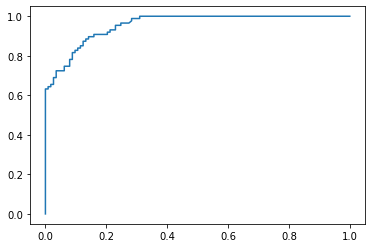

In [12]:
# 绘制ROC曲线来评估模型的预测效果
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test.values, y_pred_proba[:, 1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

In [13]:
# 计算模型的 AUC 值
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred_proba[:, 1])
score # AUC值为0.9559，说明预测效果很好

0.9559047909673483

为了更好地对客户进行精准营销，我们可以通过计算各个特征变量的特征重要性来筛选出精准营销中最重要的特征变量

In [14]:
model_clf.feature_importances_

array([0.18, 0.2 , 0.36, 0.02, 0.24])

In [15]:
# 对特征名称和特征重要性进行汇总，以方便筛选
features = x.columns # 获取特征名称
importances = model_clf.feature_importances_ # 获取特征重要性
# 整理为二维表格，按照特征重要性降序排列
importances_df = pd.DataFrame()
importances_df['特征名称'] = features
importances_df['特征重要性'] = importances
importances_df.sort_values('特征重要性', ascending=False)

,特征名称,特征重要性
2,月消费（元）,0.36
4,月消费/月收入,0.24
1,月收入（元）,0.20
0,年龄,0.18
3,性别,0.02


可见，特征重要性最高的特征变量是“月消费”，其次是“月消费/月收入”和“月收入”，“年龄”和“性别”的特征重要性排在最后